# [QuantumNerd tutorials](https://www.youtube.com/playlist?list=PLGntAYRT8AVmQMyurFoncyOdHljqeGU_R)

Start with QuandumNerd's [intro playlist](https://www.youtube.com/playlist?list=PLGntAYRT8AVki7djmjm4lVV2DImVbno3Z) on Quantum Espresso (QE) before jumping into the projects.

I'm going to try and follow QuantumNerd's projects and bring it into Jupyter [using ASE with QE](https://wiki.fysik.dtu.dk/ase/ase/calculators/espresso.html)

In [115]:
import matplotlib.pyplot as plt
%matplotlib inline
from ase import Atoms, Atom
from ase.calculators.espresso import Espresso 
# note there is also this library https://github.com/lmmentel/ase-espresso but I can't get it to work well
# Also there is this library https://github.com/jboes/decaf-espresso but i've not tried it yet
from ase.units import Bohr
from ase.build import bulk
from ase.dft.dos import DOS

## [Project 1 H2 molecule](https://www.youtube.com/watch?v=OU9i_zeapCU&list=PLGntAYRT8AVmQMyurFoncyOdHljqeGU_R&index=4)

In [98]:
pseudopotentials = {'H': 'H_ONCV_PBE-1.0.oncvpsp.upf'}

H2 = Atoms([Atom('H', [0, 0, 0]),
            Atom('H', [1, 0, 0])],
           cell=(20*Bohr, 20*Bohr, 20*Bohr))

H2_calc =  Espresso(label="H2", pseudo_dir = "/Users/matt/QE/SSSP_precision_pseudos/", prefix="H2", 
                    outdir="./H2",
                    pseudopotentials=pseudopotentials, 
                    calculation="relax", # allows our initial guess of atom positions to change
                    ion_dynamics="bfgs", # relates to the relaxing of the ions
                    ibrav=1,             # this is simple cubic lattice
                    conv_thr=1e-8,       # tells QE when to stop
                    ecutwfc=30.0,        # max energy to use in calculations, bigger this is longer simulation is 
                    kpts=(1, 1, 1)       # number of points in kx,ky,kz space, (1,1,1) is fine for isoalted molecule
                   )


H2.calc = H2_calc

print('energy = {0} eV'.format(H2.get_potential_energy()))

energy = -31.500497837735008 eV


Final atomic positions cannot be read from the output file by ASE apparently. You have to go and look at the end of `H2.pwo`

```
ATOMIC_POSITIONS (angstrom)
H             0.1189051257        0.0000000000        0.0000000000
H             0.8810948743        0.0000000000        0.0000000000
End final coordinates
```

## [Project: 2 Water molecule](https://www.youtube.com/watch?v=qth17pYTnw4&list=PLGntAYRT8AVmQMyurFoncyOdHljqeGU_R&index=5)

In [99]:
pseudopotentials = {'H': 'H_ONCV_PBE-1.0.oncvpsp.upf',
                    'O': 'O.pbe-n-kjpaw_psl.0.1.UPF'
                   }
# If we don't add some asymmetry in the H's then QE will do detect the symmetry and limit how the molcules can relax
H20 = Atoms([Atom('H', [1, 0.01, 0.03]),
            Atom('H', [-1, 0.01, 0.02]), 
            Atom('O', [0, 0, 0])],
           cell=(10*Bohr, 10*Bohr, 10*Bohr))

H20_calc =  Espresso(label="H20", pseudo_dir = "/Users/matt/QE/SSSP_precision_pseudos/", prefix="H20", 
                    outdir="./H20",
                    pseudopotentials=pseudopotentials, 
                    calculation="relax",   # allows our initial guess of atom positions to change
                    etot_conv_thr = 1e-5,  # total energy convergence threashold, lower is more accurate (use with "relax")
                    forc_conv_thr = 1e-4,  # force convergence threashold, lower is more accurate (use with "relax")
                    ion_dynamics="bfgs",   # relates to the relaxing of the ions
                    ibrav=1,               # this is simple cubic lattice
                    conv_thr=1e-8,         # tells QE when to stop
                    ecutwfc=25.0,          # max energy to use in calculations, bigger this is longer simulation is 
                    kpts=(1, 1, 1)         # number of points in kx,ky,kz space, (1,1,1) is fine for isoalted molecule
                   )

H20.calc = H20_calc

print('energy = {0} eV'.format(H20.get_potential_energy()))

energy = -595.7041969453591 eV


Needs you to install [xcrysden](http://www.xcrysden.org/) - I could not get it to work on my Mac so I couldn't do the cool bond angle animations that he did.

## [Project: 3.1 Si crystal constant and density](https://www.youtube.com/watch?v=v1LcTLSIkZI&list=PLGntAYRT8AVmQMyurFoncyOdHljqeGU_R&index=7&t=0s)

In [97]:
pseudopotentials = {'Si': 'Si.pbe-n-rrkjus_psl.1.0.0.UPF'}

Si = bulk('Si', 'diamond', a=14*Bohr)

Si_calc =  Espresso(label="Si", pseudo_dir = "/Users/matt/QE/SSSP_precision_pseudos/", prefix="Si", 
                    outdir="./Si",
                    pseudopotentials=pseudopotentials, 
                    calculation="vc-relax",   # allows our initial guess of the unit cell to change
                    etot_conv_thr = 1e-5,     # total energy convergence threashold, lower is more accurate (use with "relax")
                    forc_conv_thr = 1e-4,     # force convergence threashold, lower is more accurate (use with "relax")
                    ibrav=2,                  # this is FCC lattice
                    conv_thr=1e-7,            # tells QE when to stop
                    ecutwfc=30.0,             # max energy to use in calculations, bigger this is longer simulation is 
                    kpts=(4, 4, 4),           # number of points in kx,ky,kz space, periodic lattice needs more than (1,1,1)
                    cell_dofree="ibrav"       # QE is only allowed to to relax keeping ibrav fixed
                   )

Si.calc = Si_calc

print('energy = {0} eV'.format(Si.get_potential_energy()))

energy = -310.56988716769297 eV


Looks like you cannot make the `ATOMIC_POSITIONS` in the `pwi` file have units of **alat** as in the tutorial.

Also, I cannot find a way to add the extra zeros needed to ensure QE doesn't relax the atomic positions and only the unit cell. Specifically, I can only make this:

```
ATOMIC_POSITIONS angstrom
Si 0.0000000000 0.0000000000 0.0000000000 
Si 1.8521202370 1.8521202370 1.8521202370
```

Following his procedure we use the cell parameters, divide by 0.5 and then multiply by the alat=14 to get the final relaxed lattice constant

```
CELL_PARAMETERS (alat= 14.00000006)
  -0.369907496   0.000000000   0.369907496
   0.000000000   0.369907496   0.369907496
  -0.369907496   0.369907496   0.000000000
```

In [102]:
0.369907496/0.5*14.00000006


10.357409932388899

So, we started with a guess of the lattice constant of 14 Bohr and it's relaxed to 10.357. This is not the same as the tutorial - maybe it's because I wasn't able to prevent the atomic positions from relaxing too.

## [Project: 3.2 Silicon DOS and band gap calculation](https://www.youtube.com/watch?v=7VbHmMavTp4&list=PLGntAYRT8AVmQMyurFoncyOdHljqeGU_R&index=7)

In [122]:
pseudopotentials = {'Si': 'Si.pbe-n-rrkjus_psl.1.0.0.UPF'}

Si_better_scf = bulk('Si', 'diamond', a=10.357409932388899*Bohr)

Si_better_calc_scf =  Espresso(label="Si_better_scf", pseudo_dir = "/Users/matt/QE/SSSP_precision_pseudos/", prefix="Si_better", 
                    outdir="./Si_better",
                    pseudopotentials=pseudopotentials, 
                    calculation="scf", # self consistent calculation
                    ibrav=2,           # this is FCC lattice
                    conv_thr=1e-8,     # tells QE when to stop
                    ecutwfc=50.0,      # max energy to use in calculations, bigger this is longer simulation is 
                    kpts=(8, 8, 8),    # number of points in kx,ky,kz space, periodic lattice needs more than (1,1,1)
                                       # can have (8,8,8) here because we are not doing a computationally expensive relax
                                       # calculation
                   )

Si_better_scf.calc = Si_better_calc_scf

print('energy = {0} eV'.format(Si_better_scf.get_potential_energy()))

energy = -310.75247106355255 eV


In [123]:
Si_better_nscf = bulk('Si', 'diamond', a=10.357409932388899*Bohr)

Si_better_calc_nscf =  Espresso(label="Si_better_nscf", pseudo_dir = "/Users/matt/QE/SSSP_precision_pseudos/", prefix="Si_better", 
                    outdir="./Si_better",
                    pseudopotentials=pseudopotentials, 
                    calculation="nscf",       # non self consistent calculation
                    ibrav=2,                  # this is FCC lattice
                    conv_thr=1e-8,            # tells QE when to stop
                    ecutwfc=50.0,             # max energy to use in calculations, bigger this is longer simulation is 
                    kpts=(12, 12, 12),        # number of points in kx,ky,kz space, periodic lattice needs more than (1,1,1)
                                              # can have (12,12,12) here because we are not doing a computationally expensive relax
                                              # calculation
                    occupations="tetrahedra"  # appropriate for nscf and also appropriate for DOS calculations
                   )

Si_better_calc_nscf.calculate(Si_better_nscf)

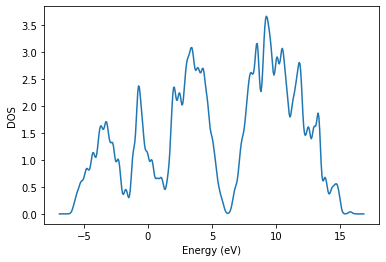

In [171]:
dos = DOS(Si_better_calc_nscf,width=0.21)
plt.plot(dos.get_energies()+Si_better_calc_nscf.get_fermi_level(), dos.get_dos())
plt.xlabel('Energy (eV)')
plt.ylabel('DOS');


Note that if you set `width=0.0` in DOS it will give an error. Seems like the QE calculator for ASE is missing something. I've made an [issue on GitLab](https://gitlab.com/ase/ase/issues/576).

I've not used the exact method from the tutorial to generate the DOS but instead use the ASE in built library. There is a difference, but not sure how much it matters yet.